# Trabajo Práctico 3 - Balance de energía - escenario ssp5 8.5

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth
import metpy

In [2]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP3/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

In [3]:
def map_adv(dato,clevels,titulo,variable,unidades):
    
    fig = plt.figure(figsize=(8, 10))
    lat = tas.lat
    lon = tas.lon
    #x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    plt.title(str(titulo))
    ax.coastlines('50m')
    ax.set_extent([-180,180, -90, 90], ccrs.PlateCarree())
    
    clevels = clevels
    im1=ax.contourf(lon, lat, dato,clevels,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both') 
    
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, linestyle='-')
    #ax.quiver(lon,lat, u_h1 - u_h2, v_h1 - v_h2, transform=ccrs.PlateCarree(), regrid_shape=15)
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .8, bottom1, 0.02, 1*height])
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    #ticklabs = cbar.ax.get_yticklabels()
    #cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label(str(variable)+' ['+str(unidades)+']',fontsize=16)

    plt.show()

## Calor sensible de aire seco

Ha = Cp*T con Cp = 1.005 Ha en [kJ/hg]

## Contenido de calor de vapor de agua a temperatura T

Hv =  q*( L + 1.84*T)                                                                              

Donde L = heat of vaporization = 2501 kJ/kg at 0°C

y 1.84*T = calor sensible del vapor de agua en kJ/kg

El término (1.84*T) se suele considerar negligible

L es función de temperatura y de hace más pequeño al aumentar la temperatura. Para valores entre 0°C y 50°C se puede hacer una aproximación lineal L(T) = 2502 – 2.378*T - computed by the author from a table with enthalpy values given by YHCHEN [ref.4]: The linear fit is excellent with R2 = 0.9998.

Combinando todo queda: Hv = q*(2502 – 0.538*T)    con Hv in kJ/kg y T en °C

## Entalpía

La entalpía es la suma del calor sensible y el calor latente

H = Ha + Hv = (1.007*T -0.026) + q*(2502 – 0.538*T)                       [eq.4] 

con H en kJ/kg, T en °C y la humedad específica q en kg/kg

### Sacar la humedad específica a partir de la humedad relativa

q = 0.622 / (pa/ea - 0.378)

donde ea es la presión de vapor y pa es la presión en superficie

La humedad relativa es la fracción de presión de vapor de agua sobre presión de vapor de agua saturada. Se multiplica por 100 para tener un porcentaje. 

RH = 100* ea/esa

entonces ea lo podemos sacar de 

ea = RH*esa/100

esat = 10**((0.7859+0.03477*T)/(1+0.00412*T) + 2)


In [113]:
#Abro CanESM5 historico
tas = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')
#Abro CanESM5 viento horizonte 1
tas_h1 = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_ssp585_ensmeani1p1f1_2020-2049_2.5.nc')
#Abro CanESM5 viento horizonte 2
tas_h2 = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_ssp585_ensmeani1p1f1_2070-2099_2.5.nc')

#Paso a celcius
tas_attrs = tas.tas.attrs 
t = tas.tas - 273.15
tas['tas'] = t
tas['tas'].attrs = tas_attrs
t_h1 = tas_h1.tas - 273.15
tas_h1['tas'] = t_h1
tas_h1['tas'].attrs = tas_attrs
t_h2 = tas_h2.tas - 273.15
tas_h2['tas'] = t_h2
tas_h2['tas'].attrs = tas_attrs

#Cambio longitudes
lon = np.arange(0,360, 362/144)
lon_attrs = tas.lon.attrs
tas['lon'] = lon
tas['lon'].attrs = lon_attrs
tas_h1['lon'] = lon
tas_h1['lon'].attrs = lon_attrs
tas_h2['lon'] = lon
tas_h2['lon'].attrs = lon_attrs
lat = tas.lat
lon = tas.lon

huss = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')

huss_h1 = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_ssp585_r1i1p1f1_2020-2049_2.5.nc')

huss_h2 = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_ssp585_r1i1p1f1_2070-2099_2.5.nc')

#Cambio longitudes
huss['lon'] = lon
huss['lon'].attrs = lon_attrs
huss_h1['lon'] = lon
huss_h1['lon'].attrs = lon_attrs
huss_h2['lon'] = lon
huss_h2['lon'].attrs = lon_attrs

#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM5 historico
u850 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc').sel(plev=85000)
v850 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc').sel(plev=85000)

#Abro CanESM5 viento horizonte 1
u850_h1 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_ssp585_r1i1p1f1_2020-2049_2.5.nc').sel(plev=85000)
v850_h1 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_ssp585_r1i1p1f1_2020-2049_2.5.nc').sel(plev=85000)

#Abro CanESM5 viento horizonte 2
u850_h2 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_ssp585_r1i1p1f1_2070-2099_2.5.nc').sel(plev=85000)
v850_h2 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_ssp585_r1i1p1f1_2070-2099_2.5.nc').sel(plev=85000)

lon = np.arange(0,360, 362/144)
lon_attrs = u850.lon.attrs
u850['lon'] = lon
u850['lon'].attrs = lon_attrs
v850['lon'] = lon
v850['lon'].attrs = lon_attrs
u850_h1['lon'] = lon
u850_h1['lon'].attrs = lon_attrs
v850_h1['lon'] = lon
v850_h1['lon'].attrs = lon_attrs
u850_h2['lon'] = lon
u850_h2['lon'].attrs = lon_attrs
v850_h2['lon'] = lon
v850_h2['lon'].attrs = lon_attrs


#Abro CanESM5 historico
evspsbl = xr.open_dataset(path2+'CanESM5/etp_Amon_CanESM5_historical_ensmeani1p1f1_2.5_anu.nc')
#Abro CanESM5 viento horizonte 1
evspsbl_h1 = xr.open_dataset(path2+'CanESM5/etp_Amon_CanESM5_ssp585_ensmeani1p1f1_2020-2049_2.5_anu.nc')
#Abro CanESM5 viento horizonte 2
evspsbl_h2 = xr.open_dataset(path2+'CanESM5/etp_Amon_CanESM5_ssp585_ensmeani1p1f1_2070-2099_2.5_anu.nc')

evspsbl['lon'] = lon
evspsbl['lon'].attrs = lon_attrs
evspsbl_h1['lon'] = lon
evspsbl_h1['lon'].attrs = lon_attrs
evspsbl_h2['lon'] = lon
evspsbl_h2['lon'].attrs = lon_attrs

#Genero variable de unos
unos = huss.huss / huss.huss

#Genero datos para cada horizonte
variables_historical = tas.assign(huss = huss.huss)
variables_h1 = tas_h1.assign(huss = huss_h1.huss)
variables_h2 = tas_h2.assign(huss = huss_h2.huss)

variables_historical = variables_historical.assign(unos = unos)
variables_h1 = variables_h1.assign(unos = huss_h1.huss / huss_h1.huss)
variables_h2 = variables_h2.assign(unos = huss_h2.huss / huss_h2.huss)

variables_historical = variables_historical.assign(ua = u850.ua)
variables_historical = variables_historical.assign(va = v850.va)
variables_h1 = variables_h1.assign(ua = u850_h1.ua)
variables_h1 = variables_h1.assign(va = v850_h1.va)
variables_h2 = variables_h2.assign(ua = u850_h2.ua)
variables_h2 = variables_h2.assign(va = v850_h2.va)

variables_historical = variables_historical.assign(etp = evspsbl.etp)
variables_h1 = variables_h1.assign(etp = evspsbl_h1.etp)
variables_h2 = variables_h2.assign(etp = evspsbl_h2.etp)

In [126]:
evspsbl.etp.values

array([[[-274.97412 , -274.97412 , -274.97412 , ..., -274.97412 ,
         -274.97412 , -274.97412 ],
        [-278.67346 , -278.35916 , -274.87543 , ..., -289.95956 ,
         -286.08206 , -282.32812 ],
        [-260.11362 , -257.4099  , -254.57631 , ..., -284.1415  ,
         -274.77985 , -266.57562 ],
        ...,
        [-100.49773 , -101.971085, -104.005104, ...,  -93.11522 ,
          -95.71619 ,  -98.113304],
        [-114.59694 , -114.62203 , -114.92231 , ..., -112.71442 ,
         -113.60015 , -114.14849 ],
        [-114.91886 , -114.91886 , -114.91886 , ..., -114.91886 ,
         -114.91886 , -114.91886 ]],

       [[-265.1027  , -265.1027  , -265.1027  , ..., -265.1027  ,
         -265.1027  , -265.1027  ],
        [-268.9233  , -268.59497 , -265.00192 , ..., -280.61465 ,
         -276.6237  , -272.71362 ],
        [-253.76738 , -251.24443 , -248.72345 , ..., -275.0054  ,
         -266.70804 , -259.41913 ],
        ...,
        [-104.80318 , -106.53284 , -108.17848 , ...,  

In [104]:
# Calculo el calor sensible
Ha_hist = (1.007*variables_historical.tas - 0.026*variables_historical.unos)

In [105]:
Hv_hist = variables_historical.huss*(2502 - 0.538*variables_historical.tas)

In [106]:
H_hist = Ha_hist + Hv_hist

In [107]:
H_hist_clim = H_hist.mean(dim='time')

In [108]:
# Calculo el calor sensible y latente y calculo la entalpia
Ha_hist = (1.007*variables_historical.tas - 0.026*variables_historical.unos)
Ha_hist_clim = Ha_hist.mean(dim='time')
Hv_hist = variables_historical.huss*(2502 - 0.538*variables_historical.tas)
Hv_hist_clim = Hv_hist.mean(dim='time')
H_hist = Ha_hist + Hv_hist
H_hist_clim = H_hist.mean(dim='time')

Ha_h1 = (1.007*variables_h1.tas - 0.026*variables_h1.unos)
Ha_h1_clim = Ha_h1.mean(dim='time')
Hv_h1 = variables_h1.huss*(2502 - 0.538*variables_h1.tas)
Hv_h1_clim = Hv_h1.mean(dim='time')
H_h1 = Ha_h1 + Hv_h1
H_h1_clim = H_h1.mean(dim='time')

Ha_h2 = (1.007*variables_h2.tas - 0.026*variables_h2.unos)
Ha_h2_clim = Ha_h2.mean(dim='time')
Hv_h2 = variables_h2.huss*(2502 - 0.538*variables_h2.tas)
Hv_h2_clim = Hv_h2.mean(dim='time')
H_h2 = Ha_h2 + Hv_h2
H_h2_clim = H_h2.mean(dim='time')

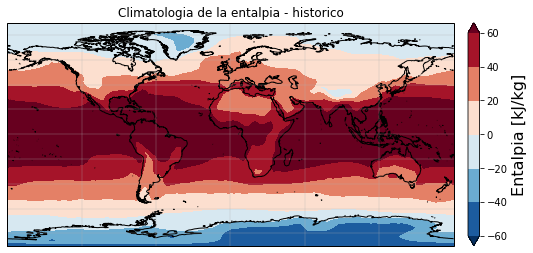

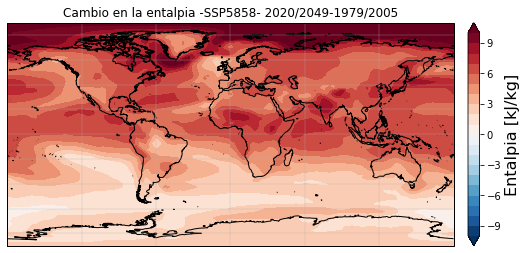

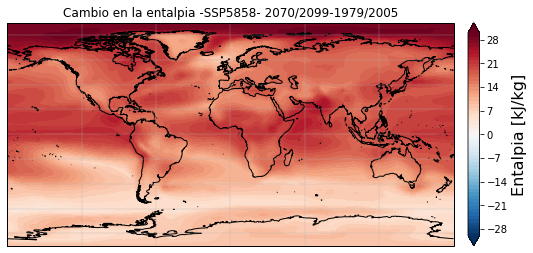

In [109]:
titulo = 'Climatologia de la entalpia - historico'
clevels = np.arange(-60,80,20)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(H_hist_clim,clevels,titulo,variable,unidades)


titulo = 'Cambio en la entalpia -SSP5858- 2020/2049-1979/2005'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(H_h1_clim-H_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en la entalpia -SSP5858- 2070/2099-1979/2005'
clevels = np.arange(-30,31,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(H_h2_clim-H_hist_clim,clevels,titulo,variable,unidades)

In [110]:
K_hist = 0.5*(variables_historical.ua**2+variables_historical.va**2)/1000

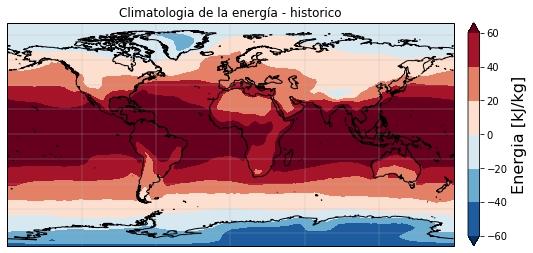

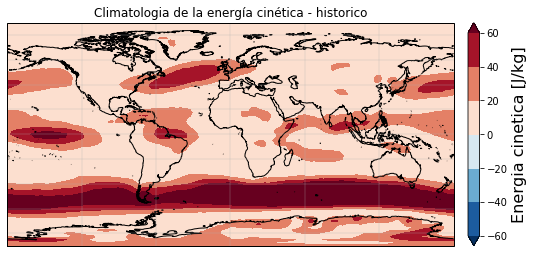

In [111]:
K_hist_clim = K_hist.mean(dim='time')

titulo = 'Climatologia de la energía - historico'
clevels = np.arange(-60,80,20)
variable = 'Energia'
unidades = 'kJ/kg'
map_adv(H_hist_clim+K_hist_clim,clevels,titulo,variable,unidades)
titulo = 'Climatologia de la energía cinética - historico'
clevels = np.arange(-60,80,20)
variable = 'Energia cinetica'
unidades = 'J/kg'
map_adv(K_hist_clim*1000,clevels,titulo,variable,unidades)

## Radiación a partir de la evapotranspiración 

El calor latente de vaporización es L = 2,260 kJ/kg
Si yo multiplico esto por la evapotranspiración obtengo la radiación 

In [141]:
L = 2260
# Lv = 2264,3 kJ/kg
Rt = evspsbl.etp*2261.3 #/8640 #Convierto a kg/m**2/s*L
Rt = (Rt/30)/864003

In [131]:
import metpy.calc as mpcalc
from metpy.units import units
data = variables_historical.metpy.parse_cf()
data_crs = ccrs.PlateCarree()
dx, dy = mpcalc.lat_lon_grid_deltas(data['lon'], data['lat'], initstring=data_crs.proj4_init)

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


In [132]:
H_hist_metpy_x = H_hist_clim*data['ua'].mean(dim='time') #* units.second / units.meter
H_hist_metpy_y = H_hist_clim*data['va'].mean(dim='time') #* units.second / units.meter

In [133]:
Hhistx = H_hist_clim*variables_historical.ua.mean(dim='time').differentiate(coord='lon')
Hhisty = H_hist_clim*variables_historical.va.mean(dim='time').differentiate(coord='lon')
H_hist = Hhistx + Hhisty

In [134]:
divergencia = mpcalc.divergence(H_hist_metpy_x, H_hist_metpy_x , dx , dy )

/home/tabu/anaconda3/envs/juliapy/lib/python3.7/site-packages/pint/quantity.py:1160: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


In [135]:
H_div = divergencia

## calculo la divergencia de la energía - radiación en el TOA (simil)

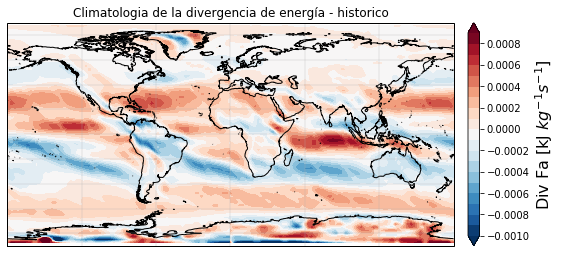

In [136]:
titulo = 'Climatologia de la divergencia de energía - historico'
clevels = np.arange(-0.001,0.001,0.0001)
variable = 'Div Fa'
unidades = 'kJ $kg^{-1} s^{-1}$'
map_adv(H_div,clevels,titulo,variable,unidades)

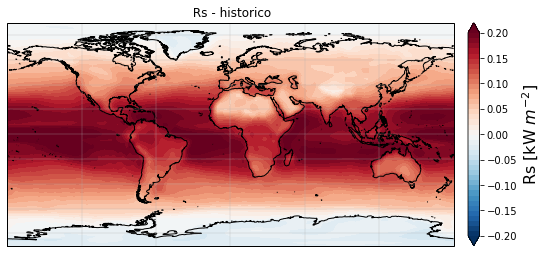

In [142]:
titulo = ' Rs - historico'
clevels = np.arange(-.2,.21,.01)
variable = 'Rs'
unidades = 'kW $m^{-2}$'
map_adv(Rt.mean(dim='time'),clevels,titulo,variable,unidades)

## Análisis del cambio en temperatura y humedad

In [50]:
HN_tas = variables_historical.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HN_huss = variables_historical.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HS_tas = variables_historical.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')
HS_huss = variables_historical.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')

HN_tas_clim = variables_historical.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')
HN_huss_clim = variables_historical.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')
HS_tas_clim = variables_historical.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')
HS_huss_clim = variables_historical.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')

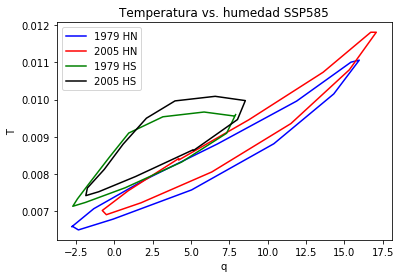

In [85]:
plt.plot(HN_tas[0:13],HN_huss[0:13],'b',label='1979 HN')
plt.plot(HN_tas[-14:-1],HN_huss[-14:-1],'r',label='2005 HN')
plt.xlabel('q')
plt.ylabel('T')
plt.title('Temperatura vs. humedad')
plt.legend()

plt.plot(HS_tas[0:13],HS_huss[0:13],'g',label='1979 HS')
plt.plot(HS_tas[-14:-1],HS_huss[-14:-1],'k',label='2005 HS')
plt.xlabel('q')
plt.ylabel('T')
plt.title('Temperatura vs. humedad SSP585')
plt.legend()

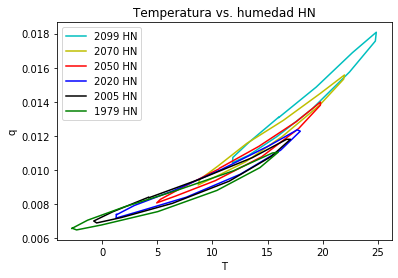

In [24]:
HN_tas_h1 = variables_h1.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HN_huss_h1 = variables_h1.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HS_tas_h1 = variables_h1.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')
HS_huss_h1 = variables_h1.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')

HN_tas_h2 = variables_h2.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HN_huss_h2 = variables_h2.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HS_tas_h2 = variables_h2.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')
HS_huss_h2 = variables_h2.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')

HN_tas_h1_c = variables_h1.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HN_huss_h1_c = variables_h1.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_tas_h1_c = variables_h1.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_huss_h1_c = variables_h1.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")

HN_tas_h2_c = variables_h2.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HN_huss_h2_c = variables_h2.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_tas_h2_c = variables_h2.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_huss_h2_c = variables_h2.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")

plt.plot(HN_tas_h2[-14:-1],HN_huss_h2[-14:-1],'c',label='2099 HN')
plt.plot(HN_tas_h2[0:13],HN_huss_h2[0:13],'y',label='2070 HN')
plt.plot(HN_tas_h1[-14:-1],HN_huss_h1[-14:-1],'r',label='2050 HN')
plt.plot(HN_tas_h1[0:13],HN_huss_h1[0:13],'b',label='2020 HN')
plt.plot(HN_tas[-14:-1],HN_huss[-14:-1],'k',label='2005 HN')
plt.plot(HN_tas[0:13],HN_huss[0:13],'g',label='1979 HN')
plt.xlabel('T')
plt.ylabel('q')
plt.title('Temperatura vs. humedad HN')
plt.legend()

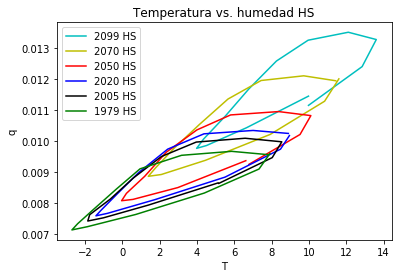

In [25]:
plt.plot(HS_tas_h2[-14:-1],HS_huss_h2[-14:-1],'c',label='2099 HS')
plt.plot(HS_tas_h2[0:13],HS_huss_h2[0:13],'y',label='2070 HS')
plt.plot(HS_tas_h1[-14:-1],HS_huss_h1[-14:-1],'r',label='2050 HS')
plt.plot(HS_tas_h1[0:13],HS_huss_h1[0:13],'b',label='2020 HS')
plt.plot(HS_tas[-14:-1],HS_huss[-14:-1],'k',label='2005 HS')
plt.plot(HS_tas[0:13],HS_huss[0:13],'g',label='1979 HS')
plt.xlabel('T')
plt.ylabel('q')
plt.title('Temperatura vs. humedad HS')
plt.legend()

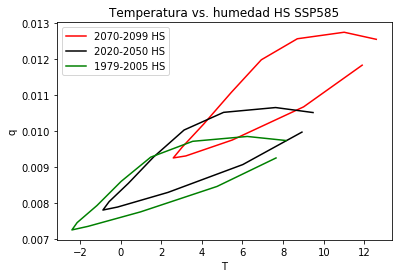

In [92]:
plt.plot(HS_tas_h2_c,HS_huss_h2_c,'r',label='2070-2099 HS')
plt.plot(HS_tas_h1_c,HS_huss_h1_c,'k',label='2020-2050 HS')
plt.plot(HS_tas_clim,HS_huss_clim,'g',label='1979-2005 HS')
plt.xlabel('T')
plt.ylabel('q')
plt.title('Temperatura vs. humedad HS SSP585')
plt.legend()

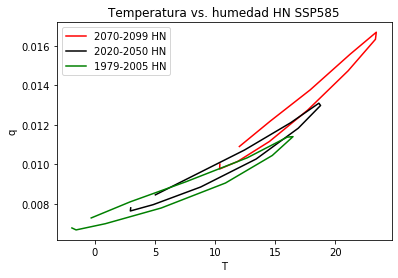

In [84]:
plt.plot(HN_tas_h2_c,HN_huss_h2_c,'r',label='2070-2099 HN')
plt.plot(HN_tas_h1_c,HN_huss_h1_c,'k',label='2020-2050 HN')
plt.plot(HN_tas_clim,HN_huss_clim,'g',label='1979-2005 HN')
plt.xlabel('T')
plt.ylabel('q')
plt.title('Temperatura vs. humedad HN SSP585')
plt.legend()

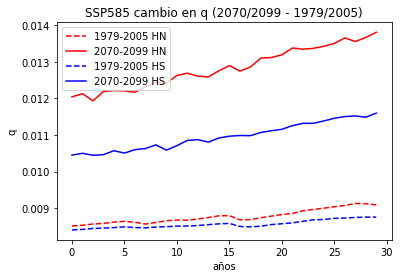

In [83]:
plt.plot(HN_huss.groupby("time.year").mean(dim='time'),'--r',label='1979-2005 HN')
plt.plot(HN_huss_h2.groupby("time.year").mean(dim='time'),'r',label='2070-2099 HN')
tendencia_huss_HN = (HN_huss.groupby("time.year").mean(dim='time')[-1] - HN_huss.groupby("time.year").mean(dim='time')[-1])/30

plt.plot(HS_huss.groupby("time.year").mean(dim='time'),'--b',label='1979-2005 HS')
plt.plot(HS_huss_h2.groupby("time.year").mean(dim='time'),'b',label='2070-2099 HS')
tendencia_huss_HS = (HS_huss.groupby("time.year").mean(dim='time')[-1] - HS_huss.groupby("time.year").mean(dim='time')[-1])/30
plt.xlabel('años')
plt.ylabel('q')
plt.title('SSP585 cambio en q (2070/2099 - 1979/2005)')
plt.legend()

In [29]:
Ha_hist = (1.007*variables_historical.tas - 0.026*variables_historical.unos)
Hv_hist = variables_historical.huss*(2502 - 0.538*variables_historical.tas)

In [30]:
Ha_h2 = (1.007*variables_h2.tas - 0.026*variables_h2.unos)
Hv_h2 = variables_h2.huss*(2502 - 0.538*variables_h2.tas)

In [31]:
H_hist = (Ha_hist + Hv_hist).mean(dim='time')
H_h2 = (Ha_h2 + Hv_h2).mean(dim='time')

H_cambio = (H_h2 - H_hist).mean(dim='lon')
Ha_cambio = (Ha_h2.mean(dim='time') - Ha_hist.mean(dim='time')).mean(dim='lon')
Hv_cambio = (Hv_h2.mean(dim='time') - Hv_hist.mean(dim='time')).mean(dim='lon')

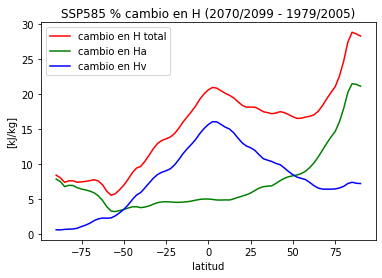

In [82]:
lat = H_cambio.lat
plt.plot(lat,H_cambio,'r',label='cambio en H total')
plt.plot(lat,Ha_cambio,'g',label='cambio en Ha')
plt.plot(lat,Hv_cambio,'b',label='cambio en Hv')
plt.title('SSP585 % cambio en H (2070/2099 - 1979/2005)')
plt.xlabel('latitud')
plt.ylabel('[kJ/kg]')
plt.legend()

In [33]:
H_cambio = (H_h2 - H_hist).mean(dim='lon')
Ha_cambio = (Ha_h2.mean(dim='time') - Ha_hist.mean(dim='time')).mean(dim='lon')
Hv_cambio = (Hv_h2.mean(dim='time') - Hv_hist.mean(dim='time')).mean(dim='lon')

T_porcentaje = Ha_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
q_porcentaje = Hv_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
T_porcentaje = Ha_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
q_porcentaje_HN = Hv_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
T_porcentaje_HS = Ha_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')
q_porcentaje_HS = Hv_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')

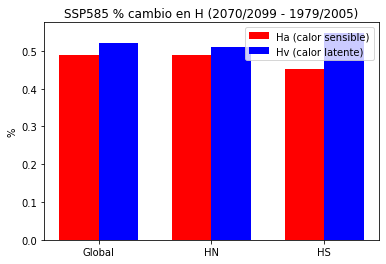

In [81]:

labels = ['Global', 'HN', 'HS']
T_percent = [T_porcentaje.values, T_porcentaje.values, T_porcentaje_HS.values]
q_percent = [q_porcentaje.values,q_porcentaje_HN.values,q_porcentaje_HS.values]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, T_percent, width, label='Ha (calor sensible)',color='r')
rects2 = ax.bar(x + width/2, q_percent, width, label='Hv (calor latente)',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('SSP585 % cambio en H (2070/2099 - 1979/2005)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [164]:
H_cambio = (H_h1 - H_hist).mean(dim='lon')
Ha_cambio = (Ha_h1.mean(dim='time') - Ha_hist.mean(dim='time')).mean(dim='lon')
Hv_cambio = (Hv_h1.mean(dim='time') - Hv_hist.mean(dim='time')).mean(dim='lon')

T_porcentaje = Ha_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
q_porcentaje = Hv_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
T_porcentaje = Ha_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
q_porcentaje_HN = Hv_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
T_porcentaje_HS = Ha_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')
q_porcentaje_HS = Hv_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

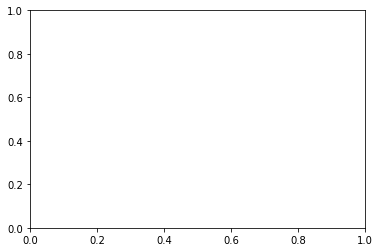

In [165]:
H_hist = (Ha_hist + Hv_hist)
H_h2 = (Ha_h2 + Hv_h2)

H_cambio_anu_HN = (H_h1.groupby('time.month').mean(dim='time') - H_hist.groupby('time.month').mean(dim='time')).sel(lat=(0,90)).mean(dim='lat').mean(dim='lon')
H_cambio_anu_HS = (H_h1.groupby('time.month').mean(dim='time') - H_hist.groupby('time.month').mean(dim='time')).sel(lat=(-90,0)).mean(dim='lat').mean(dim='lon')


labels = ['Global', 'HN', 'HS']
T_percent = [T_porcentaje.values, T_porcentaje.values, T_porcentaje_HS.values]
q_percent = [q_porcentaje.values,q_porcentaje_HN.values,q_porcentaje_HS.values]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, T_percent, width, label='Ha (calor sensible)',color='r')
rects2 = ax.bar(x + width/2, q_percent, width, label='Hv (calor latente)',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('SSP585 % cambio en H (2020/2049 - 1979/2005)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

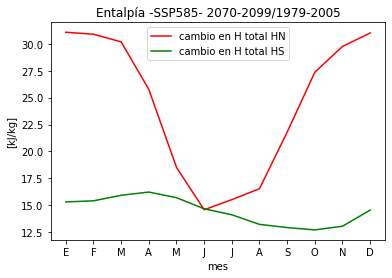

In [80]:
labels = ['E','F','M','A','M','J','J','A','S','O','N','D']
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.plot(H_cambio_anu_HN,'r',label='cambio en H total HN')
ax.plot(H_cambio_anu_HS,'g',label='cambio en H total HS')
#ax.plot(Ha_cambio_anu_HN,'g',label='cambio en Ha')
#ax.plot(Hv_cambio_anu_HN,'b',label='cambio en Hv')
plt.xlabel('mes')
plt.ylabel('[kJ/kg]')
plt.title('Entalpía -SSP585- 2070-2099/1979-2005')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()

In [52]:
## Relación de la variabilidad interanual de Rs y q, t
HN_huss.groupby("time.year").mean(dim='time')/HN_huss.mean(dim='time')

<xarray.DataArray 'huss' (year: 30)>
array([0.00851424, 0.00853268, 0.00856679, 0.0085837 , 0.00862048,
       0.00863927, 0.00861373, 0.00856514, 0.0086079 , 0.00865667,
       0.00867476, 0.00867176, 0.00870436, 0.00874405, 0.0087913 ,
       0.00879606, 0.00868242, 0.00868669, 0.00873998, 0.00878314,
       0.00882568, 0.00885534, 0.00892947, 0.00896519, 0.00899986,
       0.00903991, 0.009073  , 0.00913049, 0.00912152, 0.00908989],
      dtype=float32)
Coordinates:
    height   float64 ...
    plev     float64 8.5e+04
  * year     (year) int64 1976 1977 1978 1979 1980 ... 2001 2002 2003 2004 2005

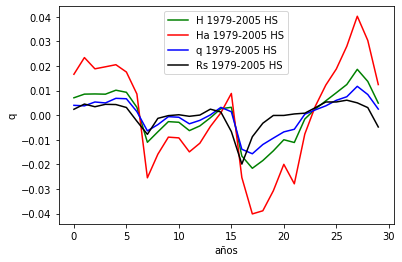

In [143]:
from scipy import signal as sg
Ha_hist = (1.007*variables_historical.tas - 0.026*variables_historical.unos)
Hv_hist = variables_historical.huss*(2502 - 0.538*variables_historical.tas)
H = Ha_hist + Hv_hist

plt.plot(sg.detrend(H.groupby("time.year").mean(dim='time').mean(dim='lon').sel(lat=slice(0,90)).mean(dim='lat')/H.mean(dim='time').mean(dim='lon').sel(lat=slice(0,90)).mean(dim='lat')),'-g',label='H 1979-2005 HS')
plt.plot(sg.detrend(Ha_hist.groupby("time.year").mean(dim='time').mean(dim='lon').sel(lat=slice(0,90)).mean(dim='lat')/Ha_hist.mean(dim='time').mean(dim='lon').sel(lat=slice(0,90)).mean(dim='lat')),'-r',label='Ha 1979-2005 HS')
plt.plot(sg.detrend(HN_huss.groupby("time.year").mean(dim='time')/HN_huss.mean(dim='time')),'b',label='q 1979-2005 HS')
plt.plot(sg.detrend(Rt.groupby("time.year").mean(dim='time').mean(dim='lon').sel(lat=slice(0,90)).mean(dim='lat')/Rt.mean(dim='time').mean(dim='lon').sel(lat=slice(0,90)).mean(dim='lat')),'-k',label='Rs 1979-2005 HS')
#tendencia_huss_HS = (HS_huss.groupby("time.year").mean(dim='time')[-1] - HS_huss.groupby("time.year").mean(dim='time')[-1])/30
plt.xlabel('años')
plt.ylabel('q')
plt.legend()

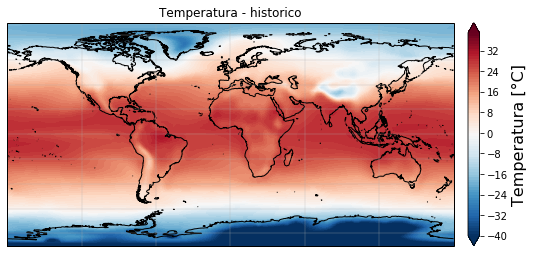

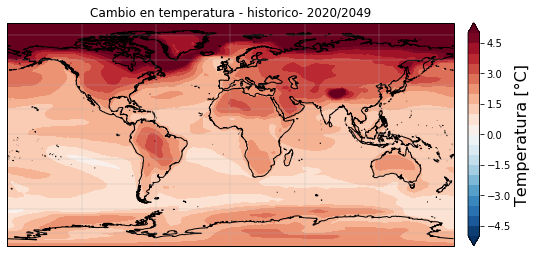

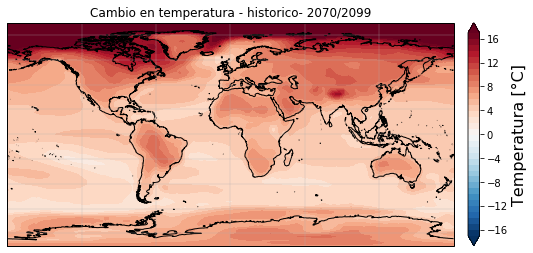

In [60]:
titulo = 'Temperatura - historico'
clevels = np.arange(-40,40,1)
variable = 'Temperatura'
unidades = '°C'
map_adv(variables_historical.tas.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en temperatura -SSP585- historico- 2020/2049'
clevels = np.arange(-5,5.5,.5)
variable = 'Temperatura'
unidades = '°C'
map_adv(variables_h1.tas.mean(dim='time')-variables_historical.tas.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en temperatura -SSP585- historico- 2070/2099'
clevels = np.arange(-17,18,1)
variable = 'Temperatura'
unidades = '°C'
map_adv(variables_h2.tas.mean(dim='time')-variables_historical.tas.mean(dim='time'),clevels,titulo,variable,unidades)

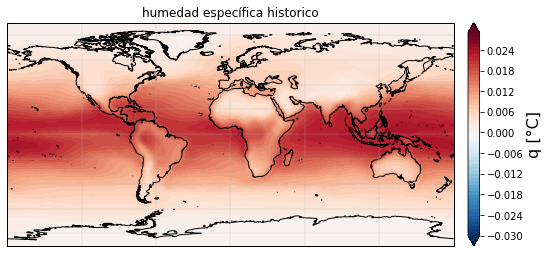

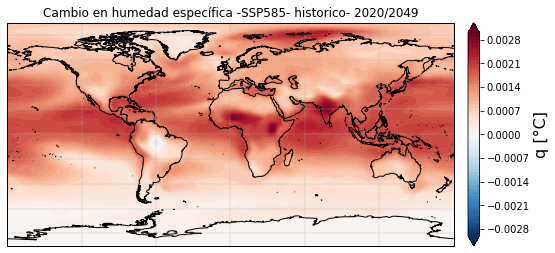

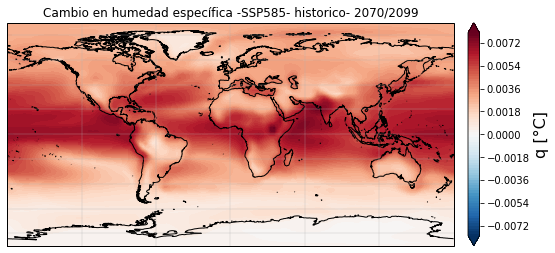

In [93]:
titulo = 'humedad específica historico'
clevels = np.arange(-.03,.03,.001)
variable = 'q'
unidades = '°C'
map_adv(variables_historical.huss.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en humedad específica -SSP585- historico- 2020/2049'
clevels = np.arange(-.003,.0031,.0001)
variable = 'q'
unidades = '°C'
map_adv(variables_h1.huss.mean(dim='time')-variables_historical.huss.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en humedad específica -SSP585- historico- 2070/2099'
clevels = np.arange(-.008,.0082,.0002)
variable = 'q'
unidades = '°C'
map_adv(variables_h2.huss.mean(dim='time')-variables_historical.huss.mean(dim='time'),clevels,titulo,variable,unidades)

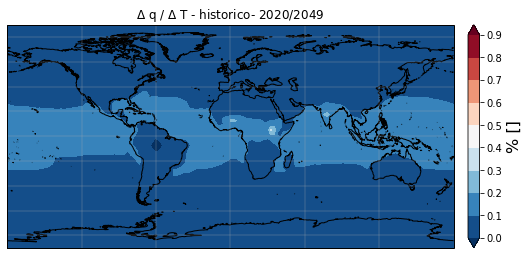

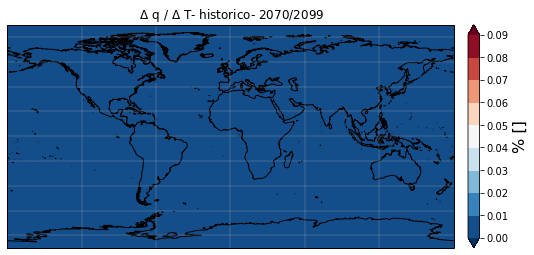

In [75]:
titulo = '$\Delta$ q / $\Delta$ T - historico- 2020/2049'
clevels = np.arange(0,1,.1)
variable = '%'
unidades = ''
map_adv((variables_h1.huss.mean(dim='time')-variables_historical.huss.mean(dim='time'))/(variables_h1.tas.mean(dim='time')-variables_historical.tas.mean(dim='time'))*100,clevels,titulo,variable,unidades)

titulo = ' $\Delta$ q / $\Delta$ T- historico- 2070/2099'
clevels = np.arange(0,.1,.01)
variable = '%'
unidades = ''
map_adv((variables_h2.huss.mean(dim='time')-variables_historical.huss.mean(dim='time'))/(variables_h2.tas.mean(dim='time')-variables_historical.tas.mean(dim='time')),clevels,titulo,variable,unidades)

In [144]:
Rt = evspsbl.etp*2261.3 #/8640 #Convierto a kg/m**2/s*L
Rt = (Rt/30)/86400
Rt_h1 = evspsbl_h1.etp*2261.3 #/8640 #Convierto a kg/m**2/s*L
Rt_h1 = (Rt_h1/30)/86400
Rt_h2 = evspsbl_h2.etp*2261.3 #/8640 #Convierto a kg/m**2/s*L
Rt_h2 = (Rt_h2/30)/86400

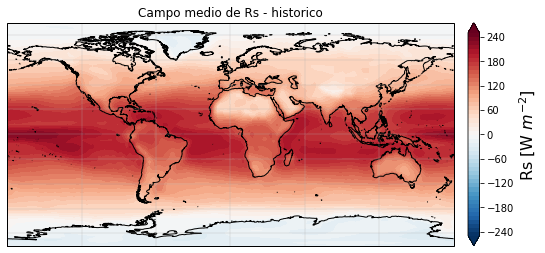

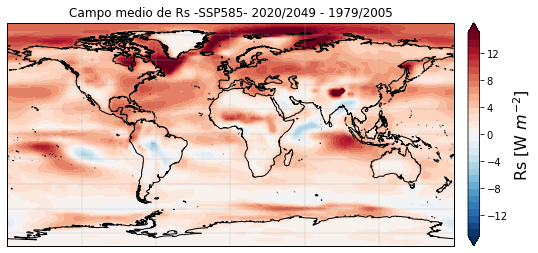

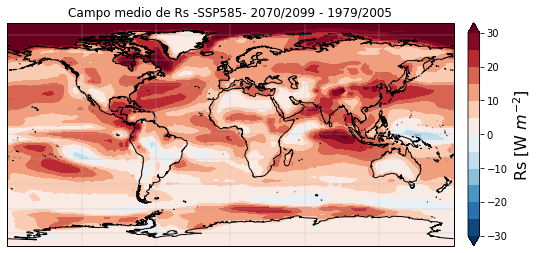

In [184]:
titulo = 'Campo medio de Rs - historico'
clevels = np.arange(-250,260,10)
variable = 'Rs'
unidades = 'W $m^{-2}$'
map_adv(Rt.mean(dim='time')*100,clevels,titulo,variable,unidades)

titulo = 'Campo medio de Rs -SSP585- 2020/2049 - 1979/2005'
clevels = np.arange(-15,16,1)
variable = 'Rs'
unidades = 'W $m^{-2}$'
map_adv((Rt_h1.mean(dim='time')- Rt.mean(dim='time'))*100,clevels,titulo,variable,unidades)

titulo = 'Campo medio de Rs -SSP585- 2070/2099 - 1979/2005'
clevels = np.arange(-30,35,5)
variable = 'Rs'
unidades = 'W $m^{-2}$'
map_adv((Rt_h2.mean(dim='time')- Rt.mean(dim='time'))*100,clevels,titulo,variable,unidades)

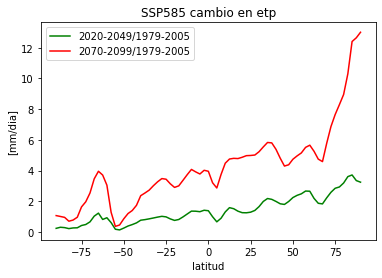

In [180]:
lat = H_cambio.lat
plt.plot(lat,(evspsbl_h1.etp.mean(dim='time')- evspsbl.etp.mean(dim='time')).mean(dim='lon')/30.4,'g',label='2020-2049/1979-2005')
plt.plot(lat,(evspsbl_h2.etp.mean(dim='time')- evspsbl.etp.mean(dim='time')).mean(dim='lon')/30.4,'r',label='2070-2099/1979-2005')
#plt.plot(lat,Hv_cambio,'b',label='cambio en Hv')
plt.title('SSP585 cambio en etp')
plt.xlabel('latitud')
plt.ylabel('[mm/dia]')
plt.legend()

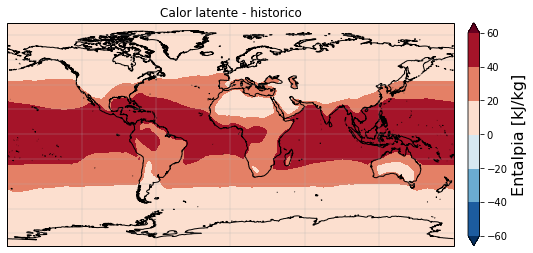

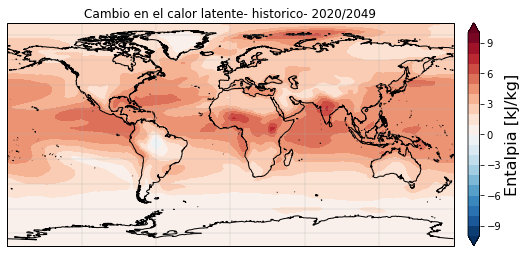

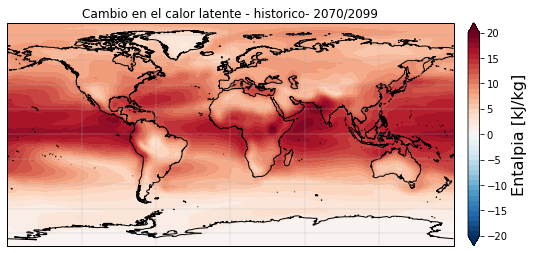

In [160]:
titulo = 'Calor latente - historico'
clevels = np.arange(-60,80,20)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Hv_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor latente- historico- 2020/2049'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Hv_h1_clim-Hv_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor latente - historico- 2070/2099'
clevels = np.arange(-20,21,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Hv_h2_clim-Hv_hist_clim,clevels,titulo,variable,unidades)

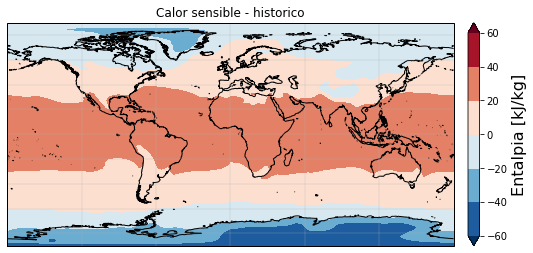

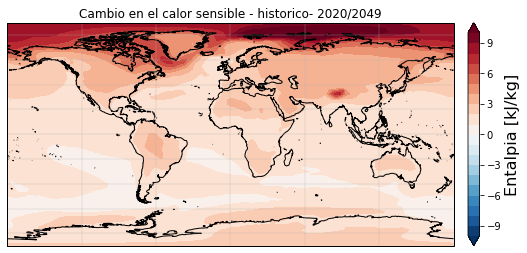

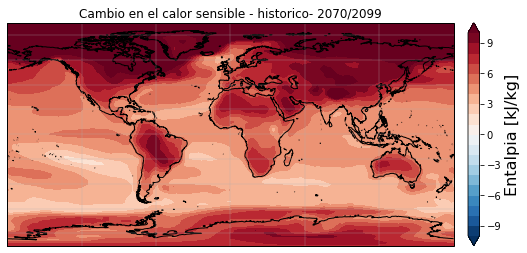

In [159]:
titulo = 'Calor sensible - historico'
clevels = np.arange(-60,80,20)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Ha_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor sensible - historico- 2020/2049'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Ha_h1_clim-Ha_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor sensible - historico- 2070/2099'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Ha_h2_clim-Ha_hist_clim,clevels,titulo,variable,unidades)